# Wine quality analysis - Exploratory analysis - PART 2

Datasource: https://archive.ics.uci.edu/ml/datasets/wine+quality

## Columns description


Column Position | Atrribute Name | Definition 
 --- | --- | --- 
1 | fixed acidity | most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
2 | volatile acidity | the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3 | citric acid | found in small quantities, citric acid can add 'freshness' and flavor to wines
4 | residual sugar | the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
5 | chlorides | the amount of salt in the wine
6 | free sulfur dioxidet | he free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
7 | total sulfur dioxide | amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8 | density | the density of water is close to that of water depending on the percent alcohol and sugar content
9 | pH | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
10 | sulphates | a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
11 | alcohol | the percent alcohol content of the wine
12 | quality | output variable (based on sensory data, score between 0 and 10)
13 | good | binary evaluation 1 - good , 0 - bad
14 | color | wine type red or white

# Project Plan 

	1. Load and clean data
	2. Feature engineering
		a. Add binary state good/bad
		b. Add wine color white/red
	3. Correlation analysis 
		a. All wine
		b. Red 
		c. White
	4. Outliers analysis
	5. Distribution analysis 
		a. Red vs white
	6. Exploratory analysis 
		a. Wine quality 
	7. Outliers analysis 
		a. Good vs bad red


# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import numpy as np

#import stats libraries 
from pyspark.mllib.stat import Statistics
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

from pyspark.sql import SparkSession

In [2]:

# May take a little while on a local computer
spark = SparkSession.builder.appName("winequality").getOrCreate()

# Load Data and Feature engineering

### Red Wine

In [3]:
# File location and type
file_location = "winequality-red.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ";"

# The applied options are for CSV files. For other file types, these will be ignored.
df_red = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df_red)

DataFrame[fixed acidity: double, volatile acidity: double, citric acid: double, residual sugar: double, chlorides: double, free sulfur dioxide: double, total sulfur dioxide: double, density: double, pH: double, sulphates: double, alcohol: double, quality: int]

In [4]:
df_red.show(5)

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
|          7.4|             0.7|        0.0|           1.9|    0.076|               11.0|                34.0| 0.9978|3.51|     0.56|    9.4|      5|
|          7.8|            0.88|        0.0|           2.6|    0.098|               25.0|                67.0| 0.9968| 3.2|     0.68|    9.8|      5|
|          7.8|            0.76|       0.04|           2.3|    0.092|               15.0|                54.0|  0.997|3.26|     0.65|    9.8|      5|
|         11.2|            0.28|       0.56|           1.9|    0.075|               17.0|           

In [5]:
df_red.show(n=2, truncate=False, vertical=True)

-RECORD 0----------------------
 fixed acidity        | 7.4    
 volatile acidity     | 0.7    
 citric acid          | 0.0    
 residual sugar       | 1.9    
 chlorides            | 0.076  
 free sulfur dioxide  | 11.0   
 total sulfur dioxide | 34.0   
 density              | 0.9978 
 pH                   | 3.51   
 sulphates            | 0.56   
 alcohol              | 9.4    
 quality              | 5      
-RECORD 1----------------------
 fixed acidity        | 7.8    
 volatile acidity     | 0.88   
 citric acid          | 0.0    
 residual sugar       | 2.6    
 chlorides            | 0.098  
 free sulfur dioxide  | 25.0   
 total sulfur dioxide | 67.0   
 density              | 0.9968 
 pH                   | 3.2    
 sulphates            | 0.68   
 alcohol              | 9.8    
 quality              | 5      
only showing top 2 rows



### White wine

In [6]:
# File location and type
file_location = "winequality-white.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ";"

# The applied options are for CSV files. For other file types, these will be ignored.
df_white = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df_white)

DataFrame[fixed acidity: double, volatile acidity: double, citric acid: double, residual sugar: double, chlorides: double, free sulfur dioxide: double, total sulfur dioxide: double, density: double, pH: double, sulphates: double, alcohol: double, quality: int]

In [7]:
df_white.show(n=2, truncate=False, vertical=True)

-RECORD 0---------------------
 fixed acidity        | 7.0   
 volatile acidity     | 0.27  
 citric acid          | 0.36  
 residual sugar       | 20.7  
 chlorides            | 0.045 
 free sulfur dioxide  | 45.0  
 total sulfur dioxide | 170.0 
 density              | 1.001 
 pH                   | 3.0   
 sulphates            | 0.45  
 alcohol              | 8.8   
 quality              | 6     
-RECORD 1---------------------
 fixed acidity        | 6.3   
 volatile acidity     | 0.3   
 citric acid          | 0.34  
 residual sugar       | 1.6   
 chlorides            | 0.049 
 free sulfur dioxide  | 14.0  
 total sulfur dioxide | 132.0 
 density              | 0.994 
 pH                   | 3.3   
 sulphates            | 0.49  
 alcohol              | 9.5   
 quality              | 6     
only showing top 2 rows



# Features engineering

In [8]:
# The task could be considered as multi-classification problem. 
# However, to make predictions more accurate we will add a featue of goodnes
# Wine quality 7 and above will be considered good = 1 , or bad = 0
# Also we could try inlcude wine color in the model , therefore add column color in the dataset

In [9]:
from pyspark.sql import functions as F
from pyspark.sql.functions import *
import pyspark.sql.functions as sf

from pyspark.sql.types import IntegerType
from pyspark.sql.functions import udf

from pyspark.sql.functions import lit, when, col, regexp_extract

In [ ]:
#red wine

In [10]:
df_red = df_red.withColumn('good', when( (col("quality") > 6), 1 ).otherwise(0))

In [11]:
df_red = df_red.withColumn('color',sf.lit("red"))

In [12]:
df_red.show(n=15, truncate=False, vertical=True)

-RECORD 0----------------------
 fixed acidity        | 7.4    
 volatile acidity     | 0.7    
 citric acid          | 0.0    
 residual sugar       | 1.9    
 chlorides            | 0.076  
 free sulfur dioxide  | 11.0   
 total sulfur dioxide | 34.0   
 density              | 0.9978 
 pH                   | 3.51   
 sulphates            | 0.56   
 alcohol              | 9.4    
 quality              | 5      
 good                 | 0      
 color                | red    
-RECORD 1----------------------
 fixed acidity        | 7.8    
 volatile acidity     | 0.88   
 citric acid          | 0.0    
 residual sugar       | 2.6    
 chlorides            | 0.098  
 free sulfur dioxide  | 25.0   
 total sulfur dioxide | 67.0   
 density              | 0.9968 
 pH                   | 3.2    
 sulphates            | 0.68   
 alcohol              | 9.8    
 quality              | 5      
 good                 | 0      
 color                | red    
-RECORD 2----------------------
 fixed a

In [ ]:
#white wine

In [13]:
df_white = df_white.withColumn('good', when( (col("quality") > 6), 1 ).otherwise(0))

In [14]:
df_white = df_white.withColumn('color',sf.lit("white"))

In [15]:
df_white.show(n=25, truncate=False, vertical=True)

-RECORD 0----------------------
 fixed acidity        | 7.0    
 volatile acidity     | 0.27   
 citric acid          | 0.36   
 residual sugar       | 20.7   
 chlorides            | 0.045  
 free sulfur dioxide  | 45.0   
 total sulfur dioxide | 170.0  
 density              | 1.001  
 pH                   | 3.0    
 sulphates            | 0.45   
 alcohol              | 8.8    
 quality              | 6      
 good                 | 0      
 color                | white  
-RECORD 1----------------------
 fixed acidity        | 6.3    
 volatile acidity     | 0.3    
 citric acid          | 0.34   
 residual sugar       | 1.6    
 chlorides            | 0.049  
 free sulfur dioxide  | 14.0   
 total sulfur dioxide | 132.0  
 density              | 0.994  
 pH                   | 3.3    
 sulphates            | 0.49   
 alcohol              | 9.5    
 quality              | 6      
 good                 | 0      
 color                | white  
-RECORD 2----------------------
 fixed a

In [16]:
appended = df_red.union(df_white)

In [17]:
appended.head(3)

[Row(fixed acidity=7.4, volatile acidity=0.7, citric acid=0.0, residual sugar=1.9, chlorides=0.076, free sulfur dioxide=11.0, total sulfur dioxide=34.0, density=0.9978, pH=3.51, sulphates=0.56, alcohol=9.4, quality=5, good=0, color='red'),
 Row(fixed acidity=7.8, volatile acidity=0.88, citric acid=0.0, residual sugar=2.6, chlorides=0.098, free sulfur dioxide=25.0, total sulfur dioxide=67.0, density=0.9968, pH=3.2, sulphates=0.68, alcohol=9.8, quality=5, good=0, color='red'),
 Row(fixed acidity=7.8, volatile acidity=0.76, citric acid=0.04, residual sugar=2.3, chlorides=0.092, free sulfur dioxide=15.0, total sulfur dioxide=54.0, density=0.997, pH=3.26, sulphates=0.65, alcohol=9.8, quality=5, good=0, color='red')]

In [18]:
appended.toPandas().to_csv('winequality_eng2.csv')

In [19]:
#For easer restore of the data, i will load dataframe from file
#Jupyter checkpoint

In [20]:
df = spark.read.csv("winequality.csv",header=True,inferSchema=True)

for i in range(0,5):
    print(df[i])

In [21]:
display(df)

DataFrame[fixed acidity: double, volatile acidity: double, citric acid: double, residual sugar: double, chlorides: double, free sulfur dioxide: double, total sulfur dioxide: double, density: double, pH: double, sulphates: double, alcohol: double, quality: int, good: int, color: string]

In [22]:
df.show(n=2, truncate=False, vertical=True)

-RECORD 0----------------------
 fixed acidity        | 7.4    
 volatile acidity     | 0.7    
 citric acid          | 0.0    
 residual sugar       | 1.9    
 chlorides            | 0.076  
 free sulfur dioxide  | 11.0   
 total sulfur dioxide | 34.0   
 density              | 0.9978 
 pH                   | 3.51   
 sulphates            | 0.56   
 alcohol              | 9.4    
 quality              | 5      
 good                 | 0      
 color                | red    
-RECORD 1----------------------
 fixed acidity        | 7.8    
 volatile acidity     | 0.88   
 citric acid          | 0.0    
 residual sugar       | 2.6    
 chlorides            | 0.098  
 free sulfur dioxide  | 25.0   
 total sulfur dioxide | 67.0   
 density              | 0.9968 
 pH                   | 3.2    
 sulphates            | 0.68   
 alcohol              | 9.8    
 quality              | 5      
 good                 | 0      
 color                | red    
only showing top 2 rows



In [23]:
#categorical and numberical columns
cat = [item[0] for item in df.dtypes if item[1].startswith('string') ]
num = [item for item in df.columns if item not in cat]
print(cat)
print(num)

['color']
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'good']


In [24]:
def CorrelationPlot(df, col_names):
  #data correlation
  df_num = df.select(col_names)
  vector_col = "numerical"
  assembler = VectorAssembler(inputCols=df_num.columns, outputCol=vector_col)
  df_vector = assembler.transform(df_num).select(vector_col)
  matrix = Correlation.corr(df_vector, vector_col)
  corr = matrix.collect()[0]["pearson({})".format(vector_col)].values
  
  size = int(np.sqrt(len(corr)))

  x_axis_labels = num # labels for x-axis
  y_axis_labels = num # labels for y-axis

  plt.figure(figsize=(14,7))
  ax = sns.heatmap(corr.reshape(size,size), xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True)
  bottom, top = ax.get_ylim()
  ax.set_ylim(bottom + 0.5, top - 0.5)

In [25]:
df_red = df.filter(df.color =='red')
df_white = df.filter(df.color =='white')

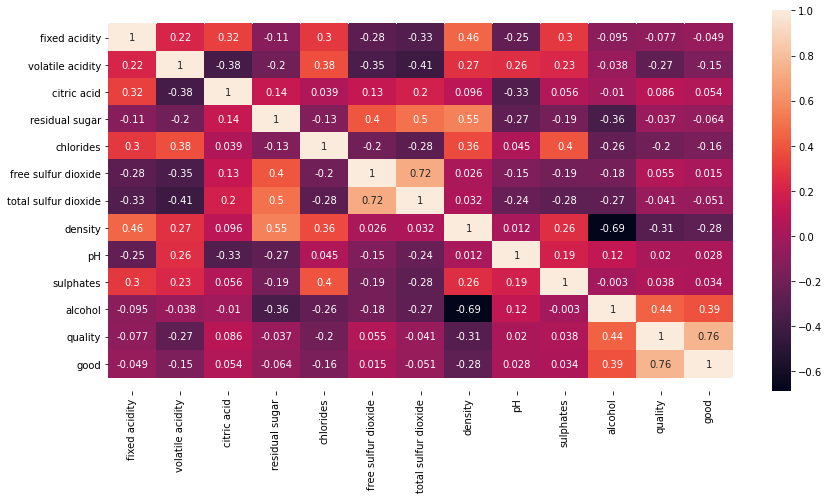

In [26]:
#all wine
CorrelationPlot(df, num)

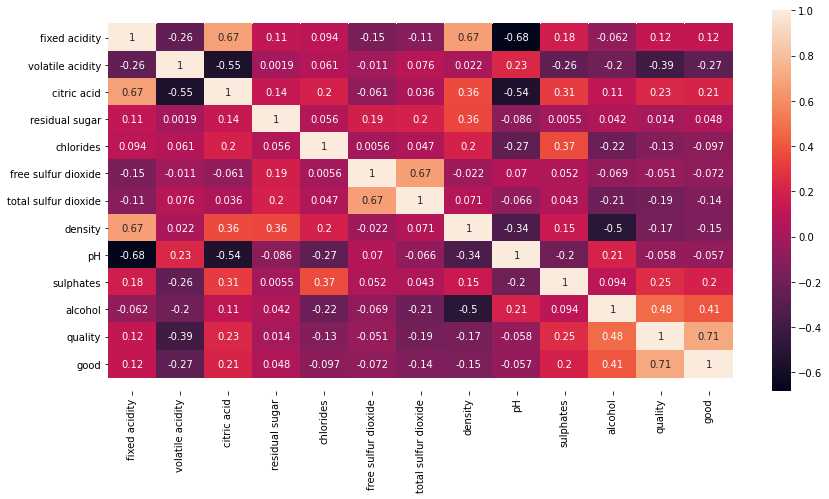

In [27]:
#red wine
CorrelationPlot(df_red, num)

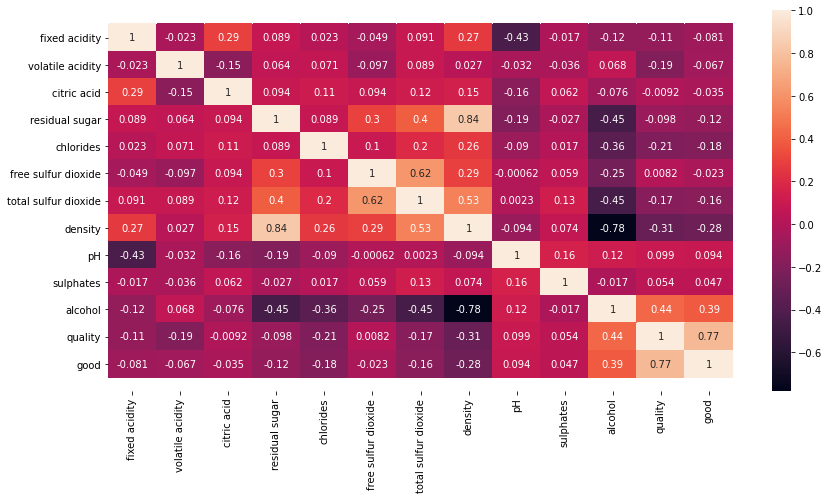

In [28]:
#white wine
CorrelationPlot(df_white, num)

In [29]:
df_pd=df.toPandas()

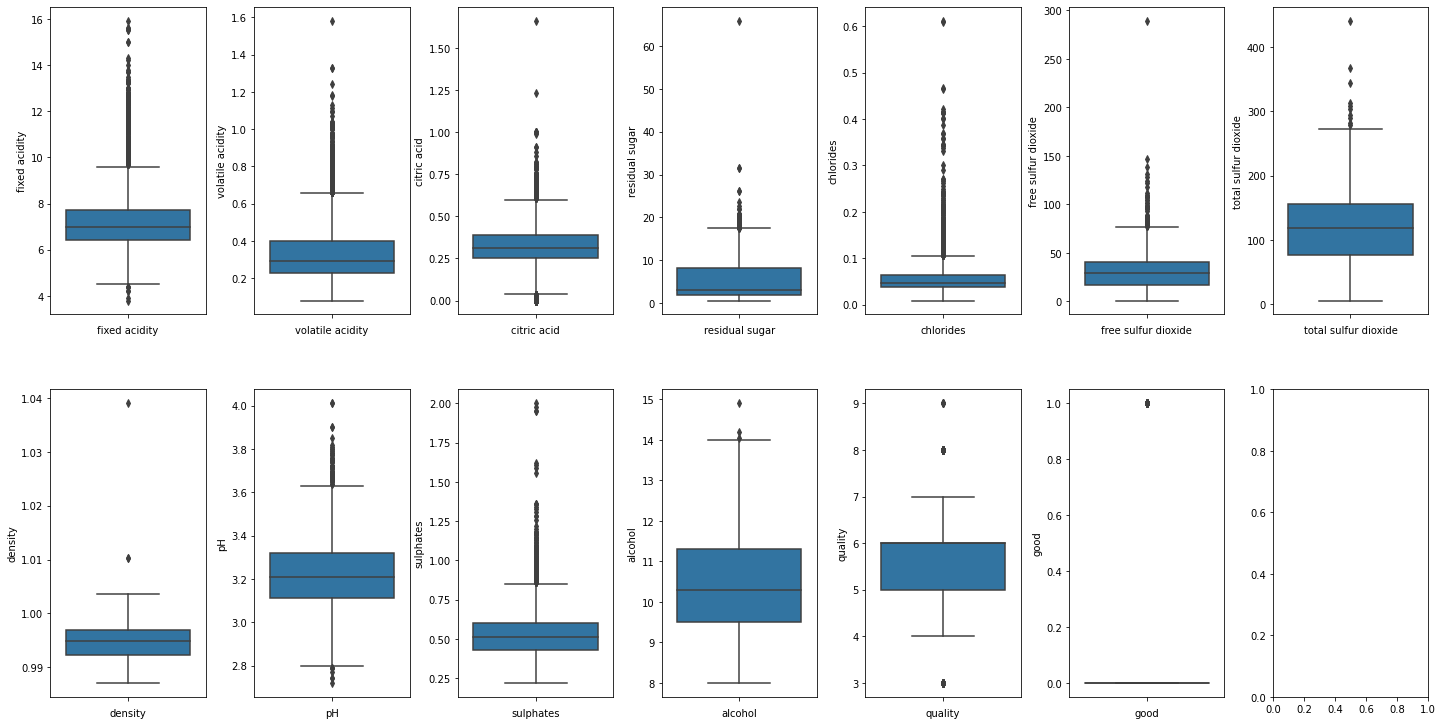

In [30]:
#Boxplot all wine
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for col in num:
        sns.boxplot(y=col, data=df_pd, ax=axs[index])
        axs[index].set(xlabel=col)
        index += 1      
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

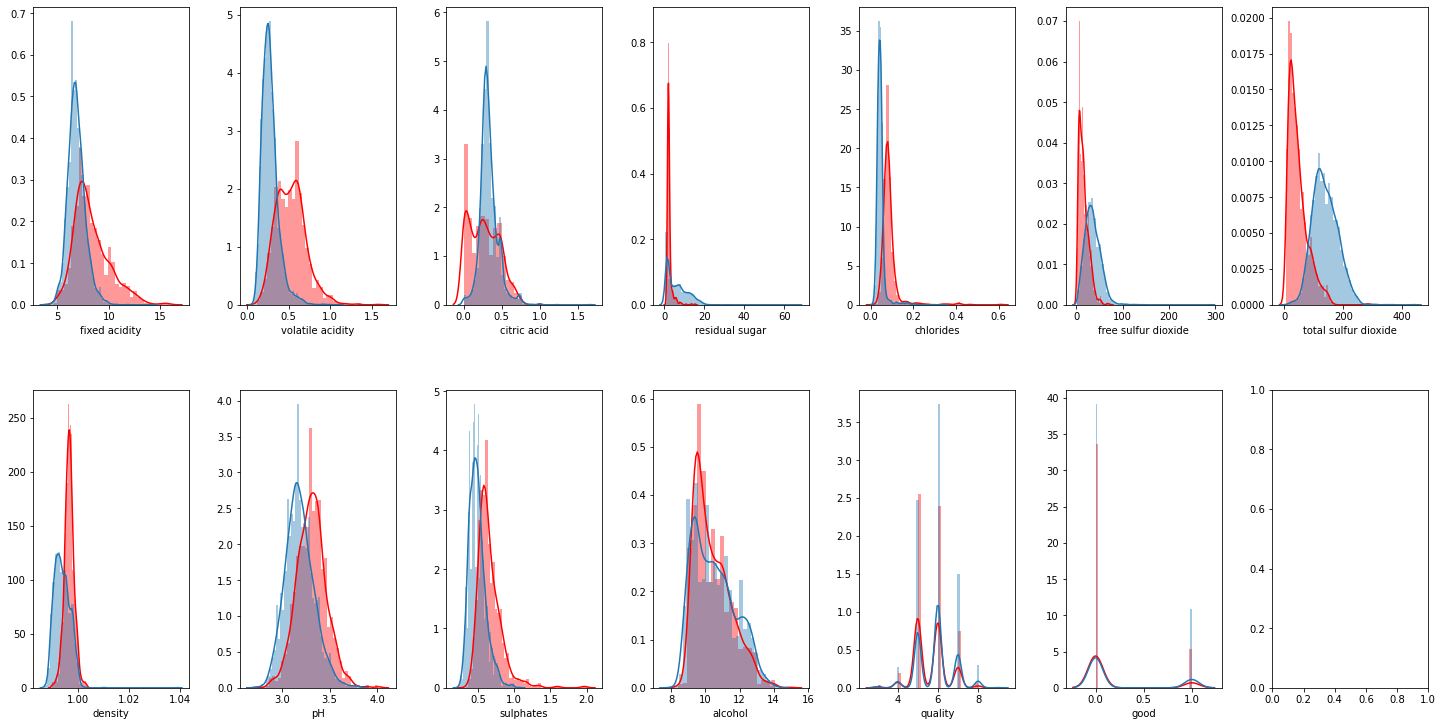

In [31]:
#red vs white
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for col in num:
    red = df_red.select(col).toPandas()    
    white = df_white.select(col).toPandas()
    sns.distplot(red, ax=axs[index],color='r', label=col)
    sns.distplot(white, ax=axs[index], label=col)
    axs[index].set(xlabel=col)
    index += 1



plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

# Exploratory analysis

/home/alienware/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


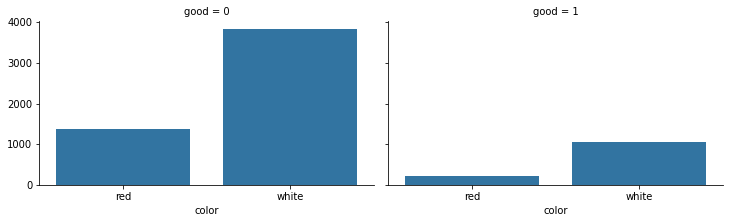

In [32]:
g =sns.FacetGrid(df_pd, col='good', height=3.2, aspect=1.6)
g.map(sns.countplot, 'color')

In [33]:
df_color_ct = pd.crosstab(df_pd.good, df_pd.color)
df_color_ct

color,red,white
good,,
0,1382,3838
1,217,1060


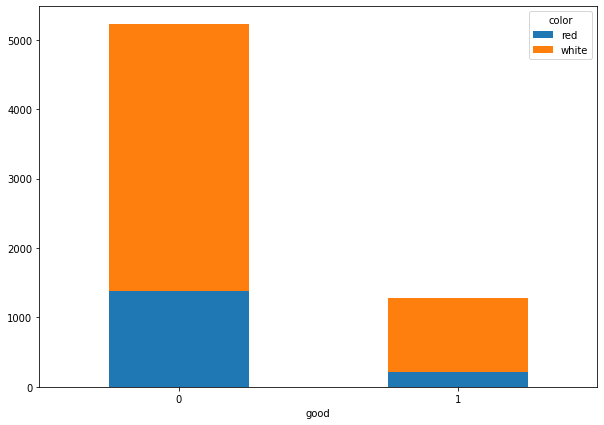

In [34]:
df_color_ct.plot(kind='bar', stacked=True, rot=0, figsize=(10,7))

In [35]:
df_color_ct2 = pd.crosstab(df_pd.quality, df_pd.color)
df_color_ct2

color,red,white
quality,,
3,10,20
4,53,163
5,681,1457
6,638,2198
7,199,880
8,18,175
9,0,5


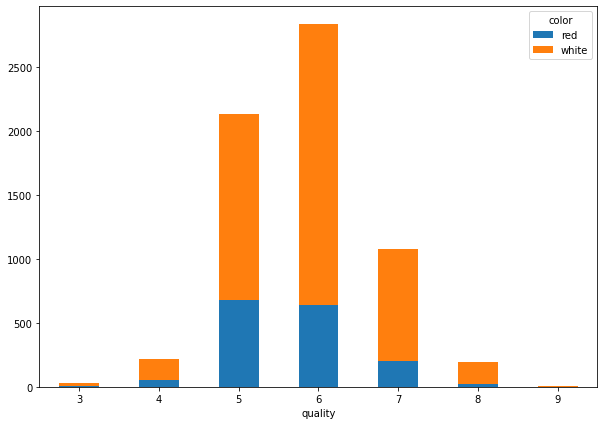

In [36]:
df_color_ct2.plot(kind='bar', stacked=True, rot=0, figsize=(10,7))

### Red wine good vs bad

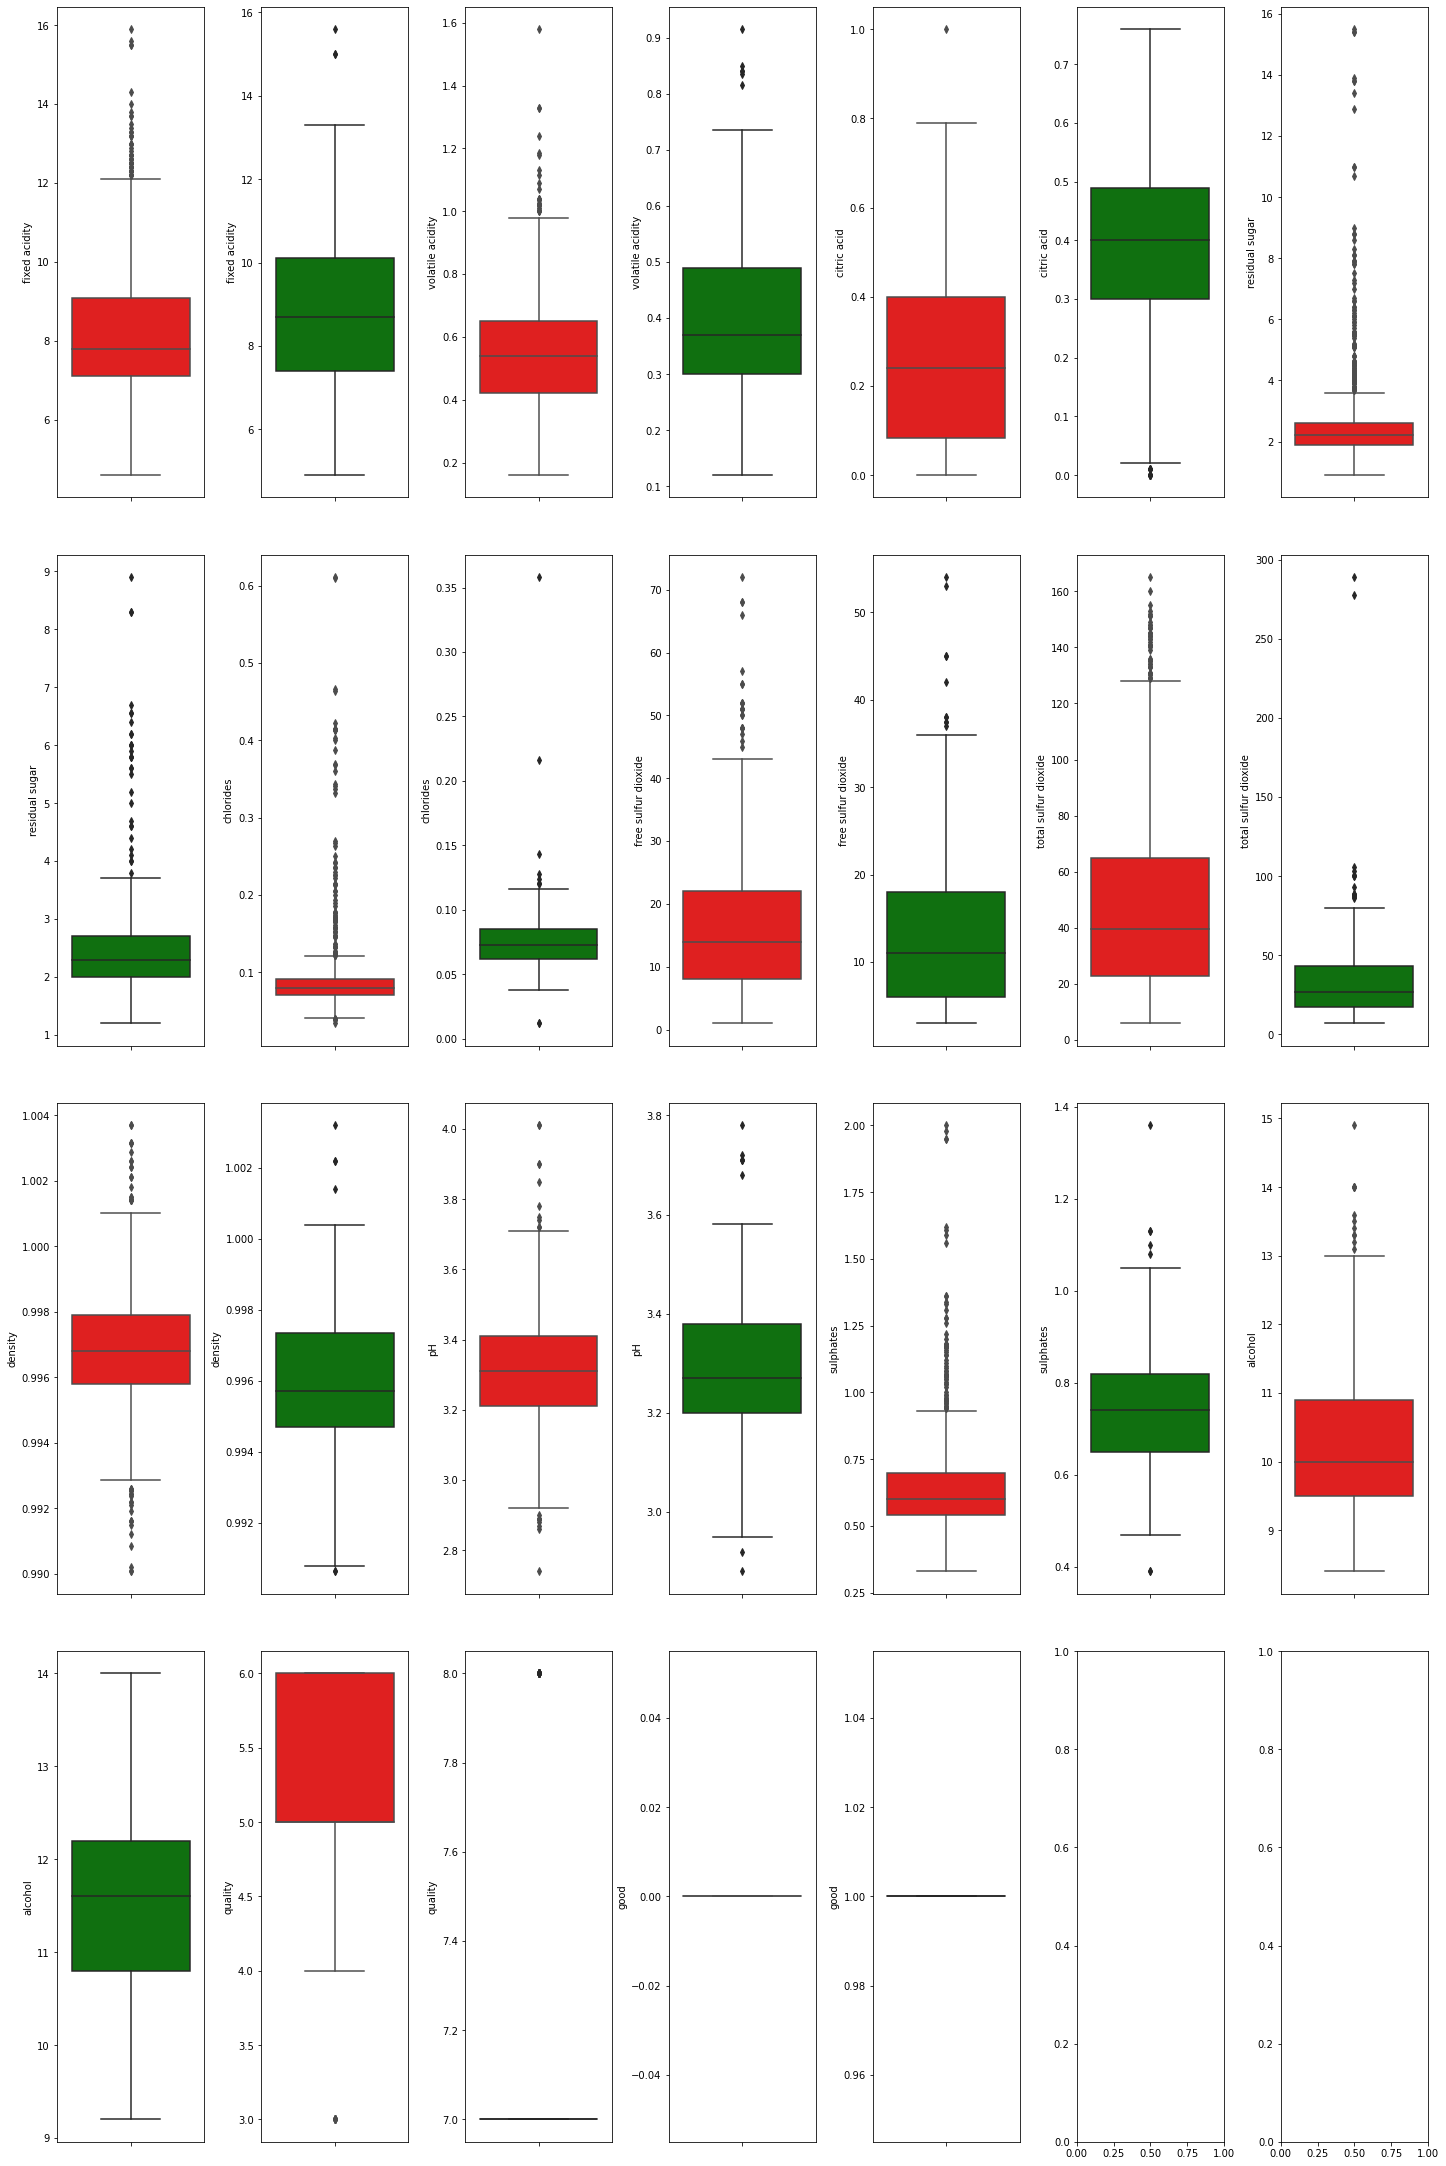

In [39]:
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(20, 30))
index = 0
df_pd_red = df_red.toPandas()
axs = axs.flatten()
for col in num:
    sns.boxplot(y=col, data=df_pd_red[df_pd_red['good'] == 0], ax=axs[index], color='red')
    sns.boxplot(y=col, data=df_pd_red[df_pd_red['good'] == 1], ax=axs[index+1], color='green')
    index += 2
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### White good vs bad 

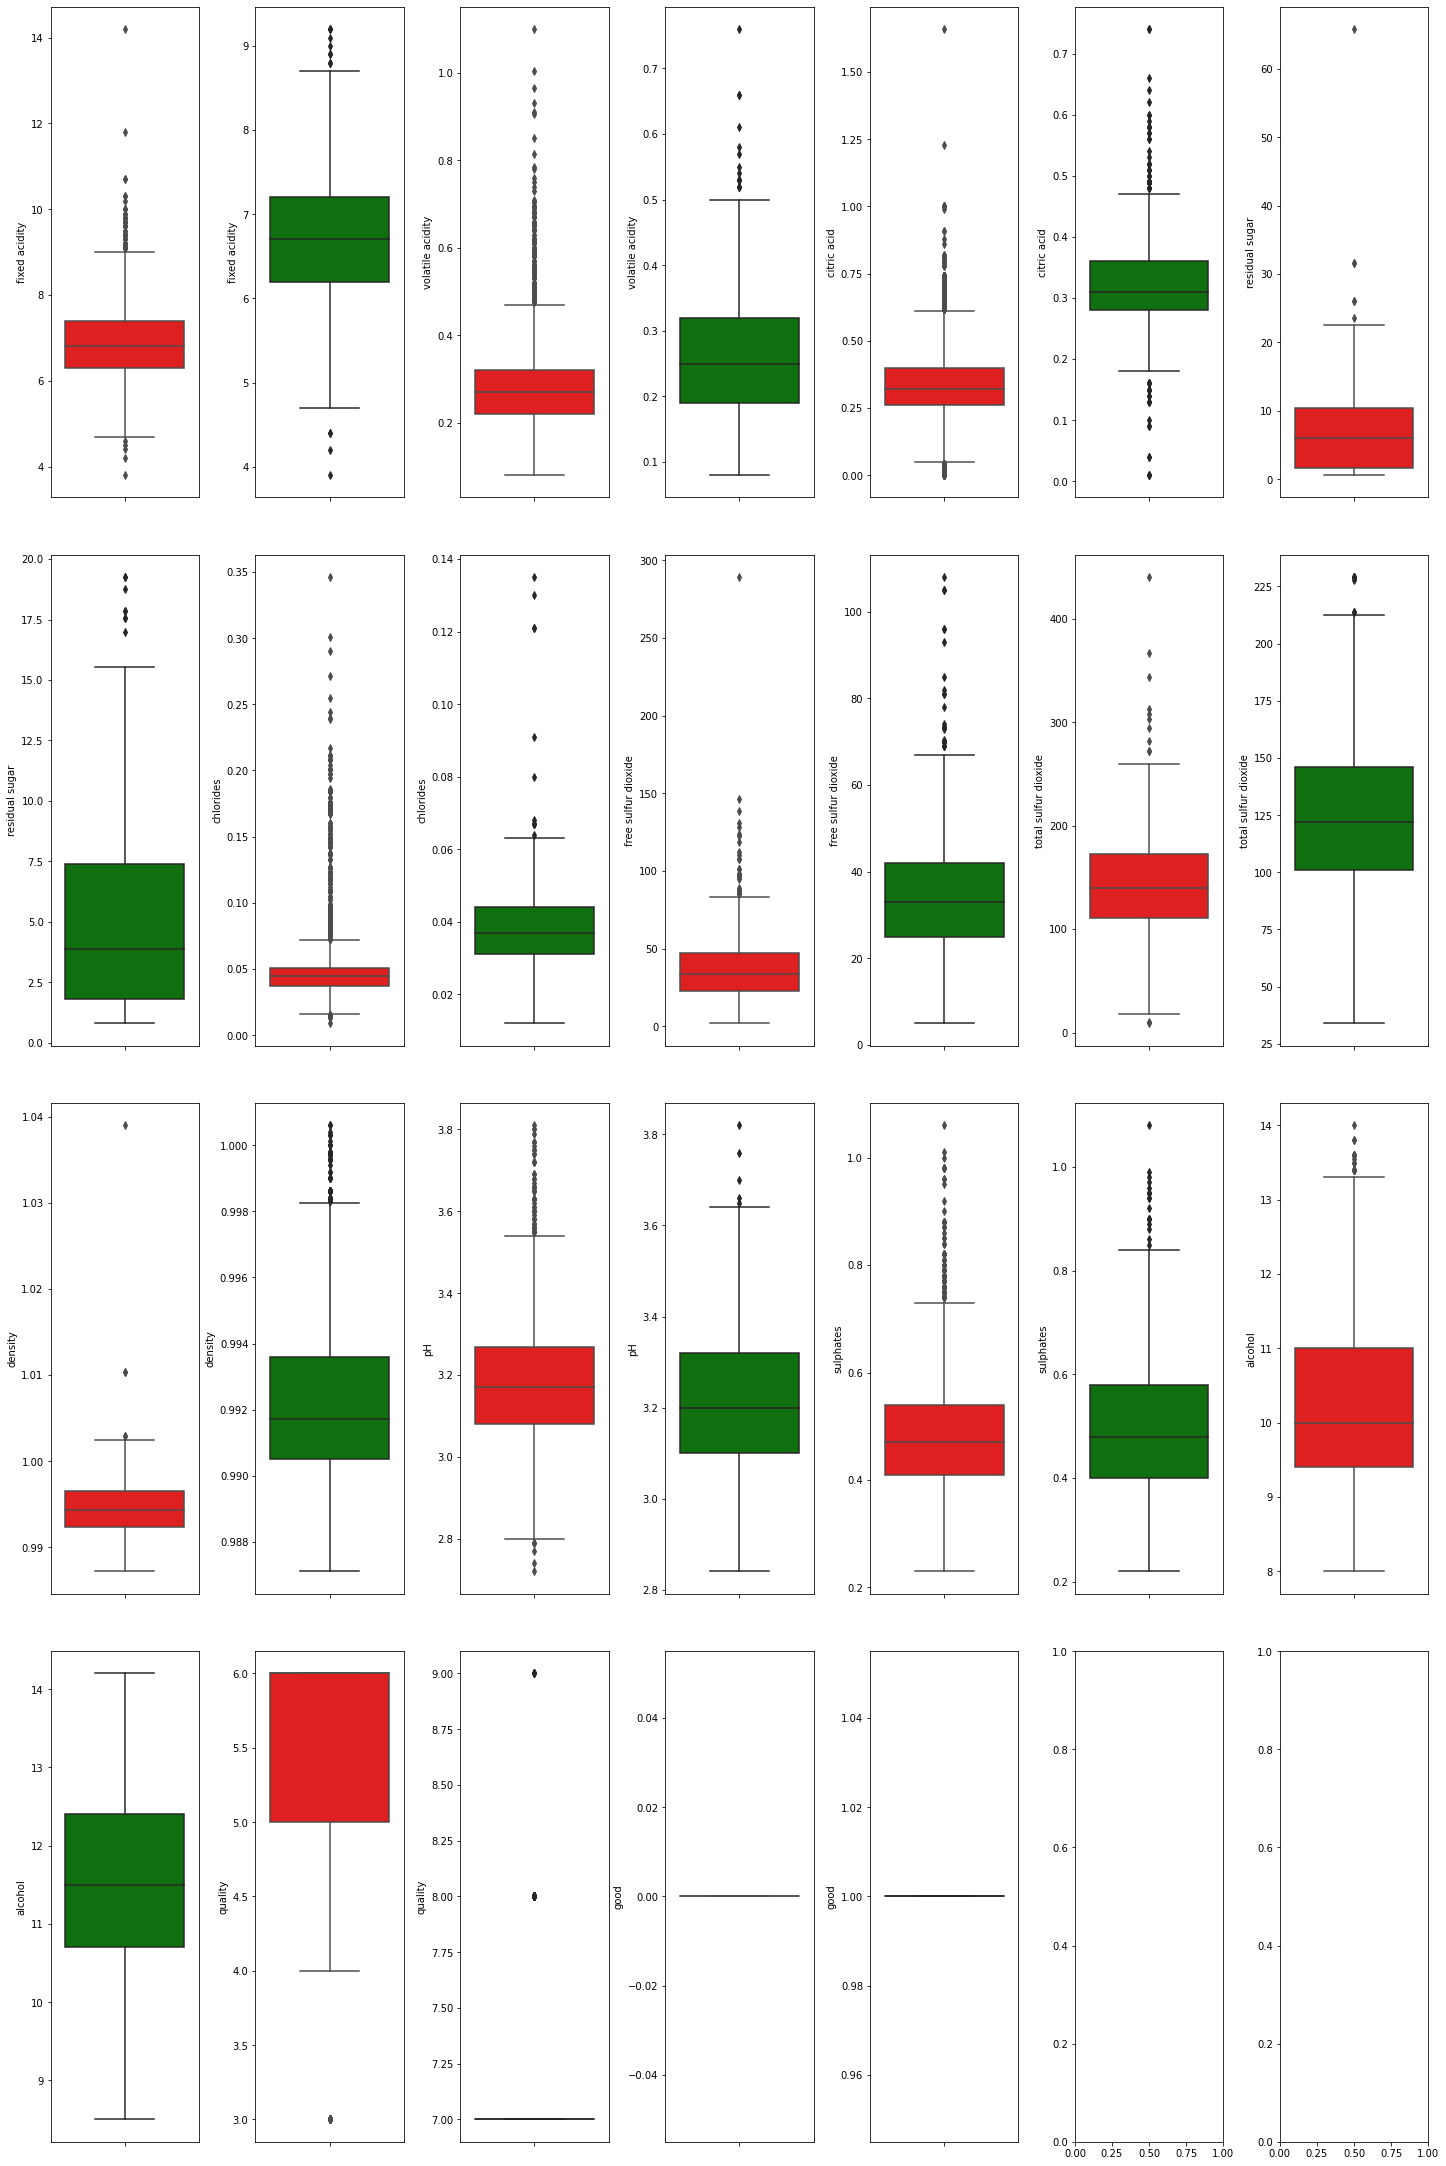

In [40]:
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(20, 30))
index = 0
df_pd_white = df_white.toPandas()
axs = axs.flatten()
for col in num:
    sns.boxplot(y=col, data=df_pd_white[df_pd_white['good'] == 0], ax=axs[index], color='red')
    sns.boxplot(y=col, data=df_pd_white[df_pd_white['good'] == 1], ax=axs[index+1], color='green')
    index += 2
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)